## Importing libraries

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

## Loading the Dataset 
### We are using Bangalore weather Dataset for our weather prediction analysis. 

In [22]:
weather_data = pd.read_csv("bangalore.csv")
weather_data

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,11,2,91,0.0,1014,14,10,109,8
1,2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,17,9,2,93,0.0,1014,14,7,85,6
2,2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,16,7,2,94,0.0,1014,13,5,61,4
3,2009-01-01 03:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,15,5,2,96,0.0,1014,12,2,37,3
4,2009-01-01 04:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,5,1,88,0.0,1015,14,5,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96427,2020-01-01 19:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,23,22,74,76,0.1,1014,23,10,107,16
96428,2020-01-01 20:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,22,23,73,81,0.6,1015,22,9,106,16
96429,2020-01-01 21:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,21,25,72,86,0.8,1016,21,9,105,17
96430,2020-01-01 22:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,20,24,69,88,0.4,1016,20,10,106,16


In [23]:
weather_data.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,11,2,91,0.0,1014,14,10,109,8
1,2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,17,9,2,93,0.0,1014,14,7,85,6
2,2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,16,7,2,94,0.0,1014,13,5,61,4
3,2009-01-01 03:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,15,5,2,96,0.0,1014,12,2,37,3
4,2009-01-01 04:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,5,1,88,0.0,1015,14,5,45,3


In [24]:
weather_data.tail()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
96427,2020-01-01 19:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,23,22,74,76,0.1,1014,23,10,107,16
96428,2020-01-01 20:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,22,23,73,81,0.6,1015,22,9,106,16
96429,2020-01-01 21:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,21,25,72,86,0.8,1016,21,9,105,17
96430,2020-01-01 22:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,20,24,69,88,0.4,1016,20,10,106,16
96431,2020-01-01 23:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,20,24,66,89,0.5,1016,20,10,108,16


In [25]:
# Dropping the unnecessary columns
#weather_data = weather_data.drop(['totalSnow_cm','uvIndex.1', 'moon_illumination', 'moonrise','moonset', 'WindChillC', 'WindGustKmph'], axis=1)

In [26]:
#weather_data = weather_data.drop(['tempC', 'visibility','winddirDegree', 'sunrise','FeelsLikeC','HeatIndexC','visibility'], axis=1)

In [27]:
weather_data

,date_time,maxtempC,mintempC,sunHour,uvIndex,sunset,DewPointC,cloudcover,humidity,precipMM,pressure,windspeedKmph
0,2009-01-01 00:00:00,27,12,11.6,5,06:05 PM,16,2,91,0.0,1014,8
1,2009-01-01 01:00:00,27,12,11.6,5,06:05 PM,16,2,93,0.0,1014,6
2,2009-01-01 02:00:00,27,12,11.6,5,06:05 PM,15,2,94,0.0,1014,4
3,2009-01-01 03:00:00,27,12,11.6,5,06:05 PM,15,2,96,0.0,1014,3
4,2009-01-01 04:00:00,27,12,11.6,5,06:05 PM,15,1,88,0.0,1015,3
...,...,...,...,...,...,...,...,...,...,...,...,...
96427,2020-01-01 19:00:00,26,18,8.7,6,06:04 PM,18,74,76,0.1,1014,16
96428,2020-01-01 20:00:00,26,18,8.7,6,06:04 PM,18,73,81,0.6,1015,16
96429,2020-01-01 21:00:00,26,18,8.7,6,06:04 PM,18,72,86,0.8,1016,17
96430,2020-01-01 22:00:00,26,18,8.7,6,06:04 PM,18,69,88,0.4,1016,16


<AxesSubplot: >

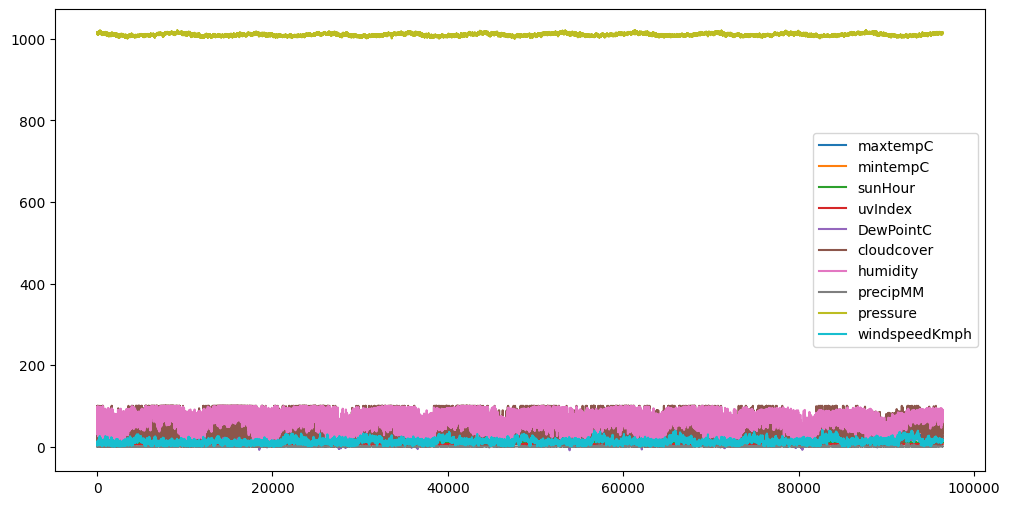

In [28]:
weather_data.plot(figsize=(12,6))

## Preprocessing: extracting relevant features and scaling the data.
### We are using "maxtempC", "mintempC", sunHour", "uvIndex", "cloudcover", "humidity", "precipMM", "pressure" parameters for weather forecasting.

In [29]:
features = ["maxtempC",, "preci "mintempC", "sunHour", "uvIndex", "cloudcover", "humidity"pMM", "pressure"]
weather_data = weather_data[features]
scaler = MinMaxScaler()
weather_data = scaler.fit_transform(weather_data)

## Spliting the dataset into training and testing part.

###  We are using 80% of data for our traing part and rest 20% is for the testing and evaluation part.

In [39]:
train_size = int(len(weather_data) * 0.8)
train_data, test_data = weather_data[:train_size], weather_data[train_size:]

In [40]:
# split the training data into training and validation sets
val_size = int(len(train_X) * 0.2)
val_X, val_Y = train_X[-val_size:], train_Y[-val_size:]
train_X, train_Y = train_X[:-val_size], train_Y[:-val_size]

## Defining a function to create time series dataset.

In [41]:
def create_dataset(weather_data, look_back=1):
    X, Y = [], []
    for i in range(len(weather_data) - look_back):
        X.append(weather_data[i:i+look_back])
        Y.append(weather_data[i+look_back])
    return np.array(X), np.array(Y)

## Creating time series datasets for training and testing.

In [42]:
look_back = 30 # number of past days to use as input
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

## Reshaping input data for LSTM (samples, time steps, features)

In [43]:
look_back = 30 # number of past days to use as input
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

## Reshaping input data for LSTM (samples, time steps, features)

In [44]:
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], len(features)))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], len(features)))

## Building the LSTM model.

In [45]:
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, len(features))))
model.add(Dense(len(features)))
model.compile(loss="mean_squared_error", optimizer="adam")

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                11800     
                                                                 
 dense_1 (Dense)             (None, 8)                 408       
                                                                 
Total params: 12,208
Trainable params: 12,208
Non-trainable params: 0
_________________________________________________________________


In [47]:
# train the model and store the history
history = model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_data=(val_X, val_Y), verbose=2)

# plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# add title and axis labels
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# set the y-axis limits
plt.ylim([0, 1])

# add a legend
plt.legend()

# show the plot
plt.show()

Epoch 1/100
2410/2410 - 33s - loss: 0.0038 - val_loss: 9.7076e-04 - 33s/epoch - 14ms/step
Epoch 2/100
2410/2410 - 32s - loss: 9.0558e-04 - val_loss: 7.5725e-04 - 32s/epoch - 13ms/step
Epoch 3/100
2410/2410 - 31s - loss: 7.3907e-04 - val_loss: 6.1327e-04 - 31s/epoch - 13ms/step
Epoch 4/100
2410/2410 - 33s - loss: 6.8864e-04 - val_loss: 6.1863e-04 - 33s/epoch - 14ms/step
Epoch 5/100
2410/2410 - 32s - loss: 6.5859e-04 - val_loss: 5.8128e-04 - 32s/epoch - 13ms/step
Epoch 6/100
2410/2410 - 32s - loss: 6.3631e-04 - val_loss: 5.3440e-04 - 32s/epoch - 13ms/step
Epoch 7/100
2410/2410 - 33s - loss: 6.2625e-04 - val_loss: 5.5784e-04 - 33s/epoch - 14ms/step
Epoch 8/100
2410/2410 - 37s - loss: 6.1598e-04 - val_loss: 5.7545e-04 - 37s/epoch - 16ms/step
Epoch 9/100
2410/2410 - 40s - loss: 6.0848e-04 - val_loss: 5.4648e-04 - 40s/epoch - 16ms/step
Epoch 10/100
2410/2410 - 41s - loss: 5.9830e-04 - val_loss: 5.2163e-04 - 41s/epoch - 17ms/step
Epoch 11/100
2410/2410 - 42s - loss: 5.9263e-04 - val_loss: 5.0

Epoch 88/100
2410/2410 - 55s - loss: 3.7491e-04 - val_loss: 3.2910e-04 - 55s/epoch - 23ms/step
Epoch 89/100
2410/2410 - 64s - loss: 3.7457e-04 - val_loss: 3.3091e-04 - 64s/epoch - 26ms/step
Epoch 90/100
2410/2410 - 53s - loss: 3.7379e-04 - val_loss: 3.2834e-04 - 53s/epoch - 22ms/step
Epoch 91/100
2410/2410 - 50s - loss: 3.7203e-04 - val_loss: 3.3598e-04 - 50s/epoch - 21ms/step
Epoch 92/100
2410/2410 - 50s - loss: 3.7113e-04 - val_loss: 3.2095e-04 - 50s/epoch - 21ms/step
Epoch 93/100
2410/2410 - 57s - loss: 3.7049e-04 - val_loss: 3.3596e-04 - 57s/epoch - 24ms/step
Epoch 94/100
2410/2410 - 55s - loss: 3.6997e-04 - val_loss: 3.2453e-04 - 55s/epoch - 23ms/step
Epoch 95/100
2410/2410 - 54s - loss: 3.6818e-04 - val_loss: 3.2921e-04 - 54s/epoch - 23ms/step
Epoch 96/100
2410/2410 - 56s - loss: 3.7026e-04 - val_loss: 3.2167e-04 - 56s/epoch - 23ms/step
Epoch 97/100
2410/2410 - 53s - loss: 3.6810e-04 - val_loss: 3.3849e-04 - 53s/epoch - 22ms/step
Epoch 98/100
2410/2410 - 60s - loss: 3.6712e-04 - 

KeyError: 'accuracy'

## Evaluating the model on test data

In [48]:
test_loss = model.evaluate(test_X, test_Y, verbose=0)
print("Test loss:", test_loss)

Test loss: 0.0005350663559511304


## Making the predictions on test data.

In [49]:
predictions = model.predict(test_X)

602/602 [==============================] - 4s 5ms/step


## Calculating the r2 and RMSE for checking the accuracy of the model.

In [50]:
from sklearn.metrics import r2_score, mean_squared_error

# calculate R2
r2 = r2_score(test_Y, predictions)
print("R2 score:", r2)

# calculate RMSE
rmse = np.sqrt(mean_squared_error(test_Y, predictions))
print("RMSE:", rmse)

R2 score: 0.9513614517434287
RMSE: 0.02313150112640842


In [52]:
# inverse scale the predictions and actual values
predictions = scaler.inverse_transform(predictions)
test_Y = scaler.inverse_transform(test_Y)
# print example predictions and actual values
print("Predictions:", predictions[0])
print("Actual values:", test_Y[0])

Predictions: [ 6.3615198e+02  3.3335303e+02  7.9740501e+01  2.7997448e+01
  1.4170420e+03  5.8121914e+03 -1.2040819e+00  2.2187510e+04]
Actual values: [  634.     334.      79.89    28.    1200.    5740.       0.   22189.  ]


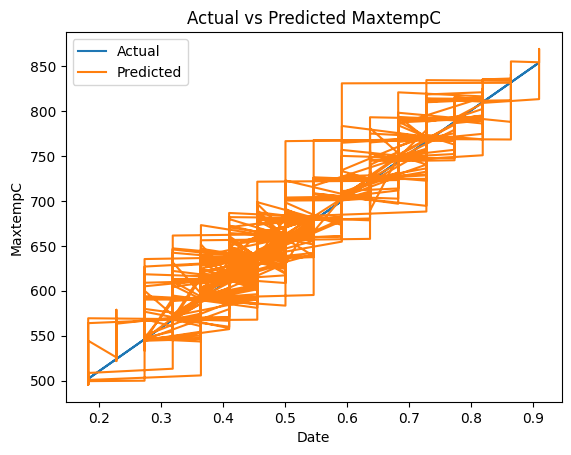

In [53]:
import matplotlib.pyplot as plt

# extract actual and predicted maxtempC values
actual_maxtempC = test_Y[:,0]
predicted_maxtempC = predictions[:,0]

# create a time axis for the test data
test_time = weather_data[train_size+look_back:, 0]

# plot the actual and predicted values of maxtempC
plt.plot(test_time, actual_maxtempC, label="Actual")
plt.plot(test_time, predicted_maxtempC, label="Predicted")

plt.title("Actual vs Predicted MaxtempC")
plt.xlabel("Date")
plt.ylabel("MaxtempC")
plt.legend()

plt.show()

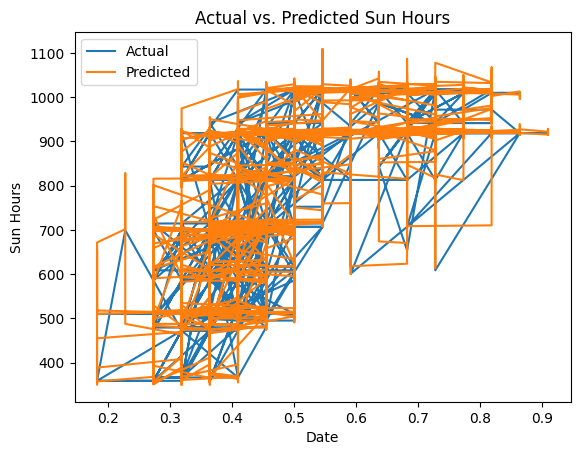

In [54]:
import matplotlib.pyplot as plt

# inverse scale the predictions and actual values
predictions = scaler.inverse_transform(predictions)
test_Y = scaler.inverse_transform(test_Y)

# extract the actual and predicted values of sunHour
actual_sunhour = test_Y[:,2]
predicted_sunhour = predictions[:,2]

# create a time axis for the test data
test_time = weather_data[train_size+look_back:,0]

# plot the actual and predicted values of sunHour
plt.plot(test_time, actual_sunhour, label="Actual")
plt.plot(test_time, predicted_sunhour, label="Predicted")

plt.xlabel("Date")
plt.ylabel("Sun Hours")
plt.title("Actual vs. Predicted Sun Hours")
plt.legend()
plt.show()

In [55]:
# get the most recent 30 days of data
recent_data = weather_data[-look_back:]

# scale the recent data
recent_data = scaler.transform(recent_data)

# reshape input data for LSTM (samples, time steps, features)
recent_data = np.reshape(recent_data, (1, look_back, len(features)))

# make predictions for the next 12 hours
forecast = []
for i in range(12):
    prediction = model.predict(recent_data)
    forecast.append(prediction[0])
    recent_data = np.append(recent_data[:,1:,:], prediction.reshape(1,1,len(features)), axis=1)

# inverse scale the forecast
forecast = scaler.inverse_transform(forecast)

# print the forecast
print("Forecast for the next 12 hours:")
for i in range(12):
    print("Hour", i+1, ":", forecast[i])

1/1 [==============================] - 0s 27ms/step


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Forecast for the next 12 hours:
Hour 1 : [ 37.93353987  39.86349237  19.77040687   5.15928245 172.5348711
 126.9905448    2.48546118 955.95126152]
Hour 2 : [ 33.2006464   23.61655724   9.62849468   5.75107241 110.7083559
  50.20750141   1.34317183 979.27005124]
Hour 3 : [3.36456892e+01 3.20204802e+01 1.25090863e+01 6.06670284e+00
 1.74310887e+02 1.20880651e+02 9.83575685e-01 9.91232155e+02]
Hour 4 : [ 28.72159874  29.57424033  11.20417627   6.65559506 161.05501652
 105.76496029   2.43189627 990.67493156]
Hour 5 : [ 28.13803059  26.01136708  12.33778406   7.05776858 161.67699099
 111.33829236   6.82962344 991.66667029]
Hour 6 : [ 25.30871844  25.09393924  11.98544716   7.23693991 162.44703531
 111.62582994   7.1167223  994.21230766]
Hour 7 : [ 25.27525795  23.83640331  13.23428997   7.11023569 156.31713867
 107.05619001   3.24093268 996.36902195]
Hour 8 : [2.55069637e+01 2.21666169e+01 1.45481800e+01 6.49765563e+00
 1.38771260e+02 9.52